# Chapter 4

# 4.5.4. Model-based methods for outlier detection

Linear regression residual analysis

In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Example dataset: Height (in inches) vs Weight (in pounds)
data = {
    'Height': [60, 62, 64, 66, 68, 70, 72, 74, 76, 80, 85],
    'Weight': [50, 52, 55, 62, 65, 60, 130, 80, 85, 95, 105]
}

# Convert the dataset into a DataFrame
df = pd.DataFrame(data)

# Define independent (X) and dependent (Y) variables
X = df['Height']
Y = df['Weight']

# Add a constant term to the independent variable matrix for the intercept
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(Y, X).fit()

# Predict Y values and calculate residuals
predictions = model.predict(X)
residuals = Y - predictions

# Standardize the residuals
standardized_residuals = (residuals - np.mean(residuals)) / np.std(residuals)

# Identify outliers where standardized residuals are greater than |3|
outliers = df[np.abs(standardized_residuals) > 3]

# Output the results
print("Standardized Residuals:\n", standardized_residuals)
print("Outliers Detected:\n", outliers)

# Plot the data and the regression line
plt.scatter(df['Height'], df['Weight'], label='Data Points')
plt.plot(df['Height'], predictions, color='red', label='Regression Line')
plt.xlabel('Height (inches)')
plt.ylabel('Weight (pounds)')
plt.legend()
plt.show()


Isolation Forest

Detected Outliers:
      Feature1  Feature2  Outlier
37  -2.619745  0.821903       -1
100  4.528477  2.889223       -1
101  2.364189  2.429809       -1
102 -1.686106 -2.476898       -1
103  3.712334  3.721361       -1
104  4.404868  4.958887       -1


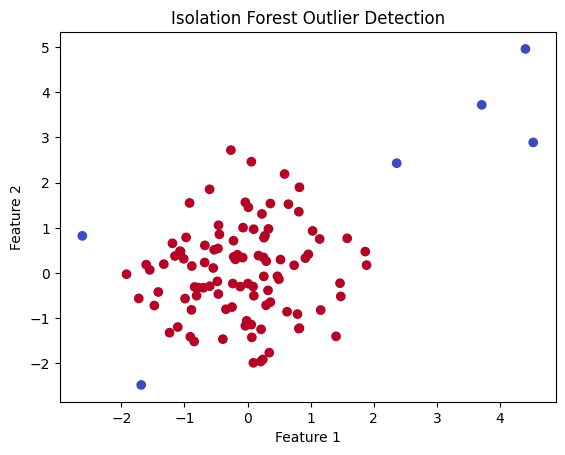

In [1]:
import numpy as np
import pandas as pd
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt

# Generate sample data with outliers
np.random.seed(42)
# 100 normal data points
normal_data = np.random.normal(0, 1, (100, 2))
# 5 outliers
outliers = np.random.uniform(low=-6, high=6, size=(5, 2))

# Combine the data into a DataFrame
data = np.vstack([normal_data, outliers])
df = pd.DataFrame(data, columns=['Feature1', 'Feature2'])

# Initialize the Isolation Forest model
iso_forest = IsolationForest(contamination=0.05, random_state=42)

# Fit the model
iso_forest.fit(df)

# Predict outliers (-1 indicates outliers, 1 indicates normal points)
df['Outlier'] = iso_forest.predict(df)

# Print the detected outliers
outliers_detected = df[df['Outlier'] == -1]
print("Detected Outliers:\n", outliers_detected)

# Plot the data
plt.scatter(df['Feature1'], df['Feature2'], c=df['Outlier'], cmap='coolwarm', label='Data Points')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Isolation Forest Outlier Detection')
plt.show()


One-Class SVM

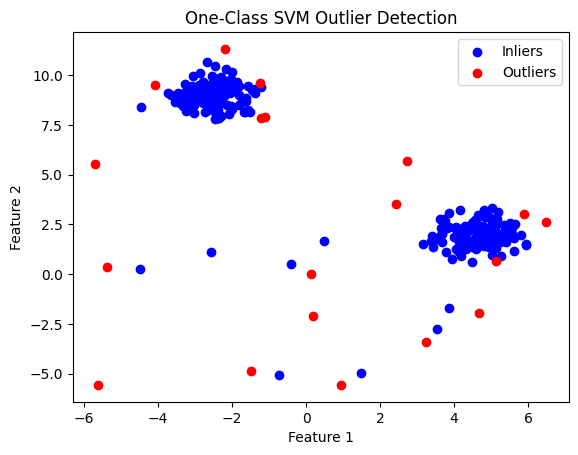

Detected Outliers:
 [[-1.12040248  7.89392701]
 [-4.08104469  9.50742763]
 [-1.2359039   9.63376528]
 [ 5.87632759  3.02637419]
 [-2.20016901 11.32592502]
 [ 6.48720732  2.64491463]
 [ 5.13752218  0.6464885 ]
 [-1.2293776   7.84303345]
 [ 0.13610879  0.01819554]
 [ 2.42360253  3.54951203]
 [ 4.6800641  -1.94405812]
 [-1.49300457 -4.87221672]
 [ 0.93936169 -5.56869271]
 [-5.633997   -5.55182174]
 [ 3.23992264 -3.41014767]
 [-5.37981935  0.37625558]
 [ 2.713096    5.71022495]
 [ 0.19560418 -2.12452232]
 [-5.69579108  5.55178098]]


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_blobs

# Generate sample data with normal points and outliers
# Generating normal data (two clusters)
X, _ = make_blobs(n_samples=300, centers=2, cluster_std=0.60, random_state=42)

# Adding some outliers
X_outliers = np.random.uniform(low=-6, high=6, size=(20, 2))
X = np.vstack([X, X_outliers])

# Fit the One-Class SVM model
# nu is an upper bound on the fraction of training errors and a lower bound of the fraction of support vectors
# kernel defines the type of decision boundary (we use 'rbf' for non-linear boundary)
model = svm.OneClassSVM(nu=0.05, kernel="rbf", gamma=0.1)
model.fit(X)

# Predict the inliers (1) and outliers (-1)
predictions = model.predict(X)

# Separate the inliers and outliers for plotting
inliers = X[predictions == 1]
outliers = X[predictions == -1]

# Plot the results
plt.scatter(inliers[:, 0], inliers[:, 1], c='blue', label='Inliers')
plt.scatter(outliers[:, 0], outliers[:, 1], c='red', label='Outliers')
plt.title('One-Class SVM Outlier Detection')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

# Print outlier data points
print("Detected Outliers:\n", outliers)
